In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df1 = pd.read_csv('text_emotion.csv')
df1 = df1.rename(columns={'content': 'text'})

df1SelectedCols = df1[["text", "sentiment"]]
df1SelectedCols.shape


(40000, 2)

In [18]:
df1SelectedCols.head()

,text,sentiment
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [15]:
df2 = pd.read_csv('Emotion_final.csv')

df2 = df2.rename(columns={'Text': 'text', 'Emotion': 'sentiment'})

df2SelectedCols = df2[["text", "sentiment"]]

df2SelectedCols.shape

(21459, 2)

In [19]:
df2SelectedCols.head()

,text,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [16]:
combinedDf = pd.concat([df1SelectedCols, df2SelectedCols], axis=0)
combinedDf.shape

(61459, 2)

In [17]:
combinedDf.head()

,text,sentiment
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [20]:
combinedDf["sentiment"].value_counts()

sadness       11430
neutral        8638
worry          8459
happy          7029
love           5483
happiness      5209
anger          3103
surprise       3066
fear           2652
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: sentiment, dtype: int64

<AxesSubplot:title={'center':'Distribution of data'}, xlabel='sentiment'>

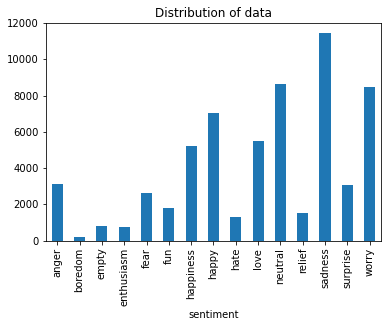

In [21]:
combinedDf.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [37]:
stopWords = stopwords.words("english")
stopWords.append('feel')
stopWords.append('feeling')
stopWords.append('like')

def cleanText(text):
    
    output = ""
    
    
    for word in text.split():
        cleanWord = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(word))
        if cleanWord in stopWords:
            pass
        else:
            output = output + " " + cleanWord
    return output

In [25]:
combinedDf.text = combinedDf.text.apply(lambda x: cleanText(x))

In [26]:
from wordcloud import WordCloud

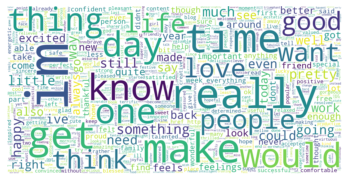

In [38]:
#Examining word distribution in positive tweets
happyTweetsDF = combinedDf[combinedDf['sentiment'] == 'happy']
happyTweets = happyTweetsDF['text']
wordcloudHappy = WordCloud(max_words = 1000 , width = 1600 , height = 800,stopwords=stopWords, background_color="white").generate(' '.join(happyTweets))
plt.imshow(wordcloudHappy, interpolation='bilinear')
plt.axis("off")
plt.show()

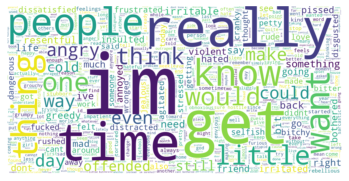

In [39]:
#Examining word distribution in angry tweets
angryTweetsDF = combinedDf[combinedDf['sentiment'] == 'anger']
angryTweets = angryTweetsDF['text']
wordcloudAngry = WordCloud(max_words = 1000 , width = 1600 , height = 800,stopwords=stopWords, background_color="white").generate(' '.join(angryTweets))
plt.imshow(wordcloudAngry, interpolation='bilinear')
plt.axis("off")
plt.show()